# Init

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read existing results

In [10]:
results_df = pd.read_csv("test_over_naive _simulation.csv",index_col=0)
results_df = results_df.dropna(subset=["corrMean"])
results_df = results_df.fillna("NONE")

# pick trh and build sets

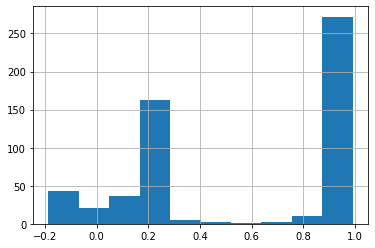

In [11]:
results_df["corrMean"].hist()
plt.show()

In [13]:
trh = 0.6
X_set = results_df[results_df.columns.difference(pd.Index(["corrMean"]))]
Y_set = (results_df["corrMean"] > trh).astype(int)


In [14]:
dummi_result_df = pd.get_dummies(X_set)


# tree 

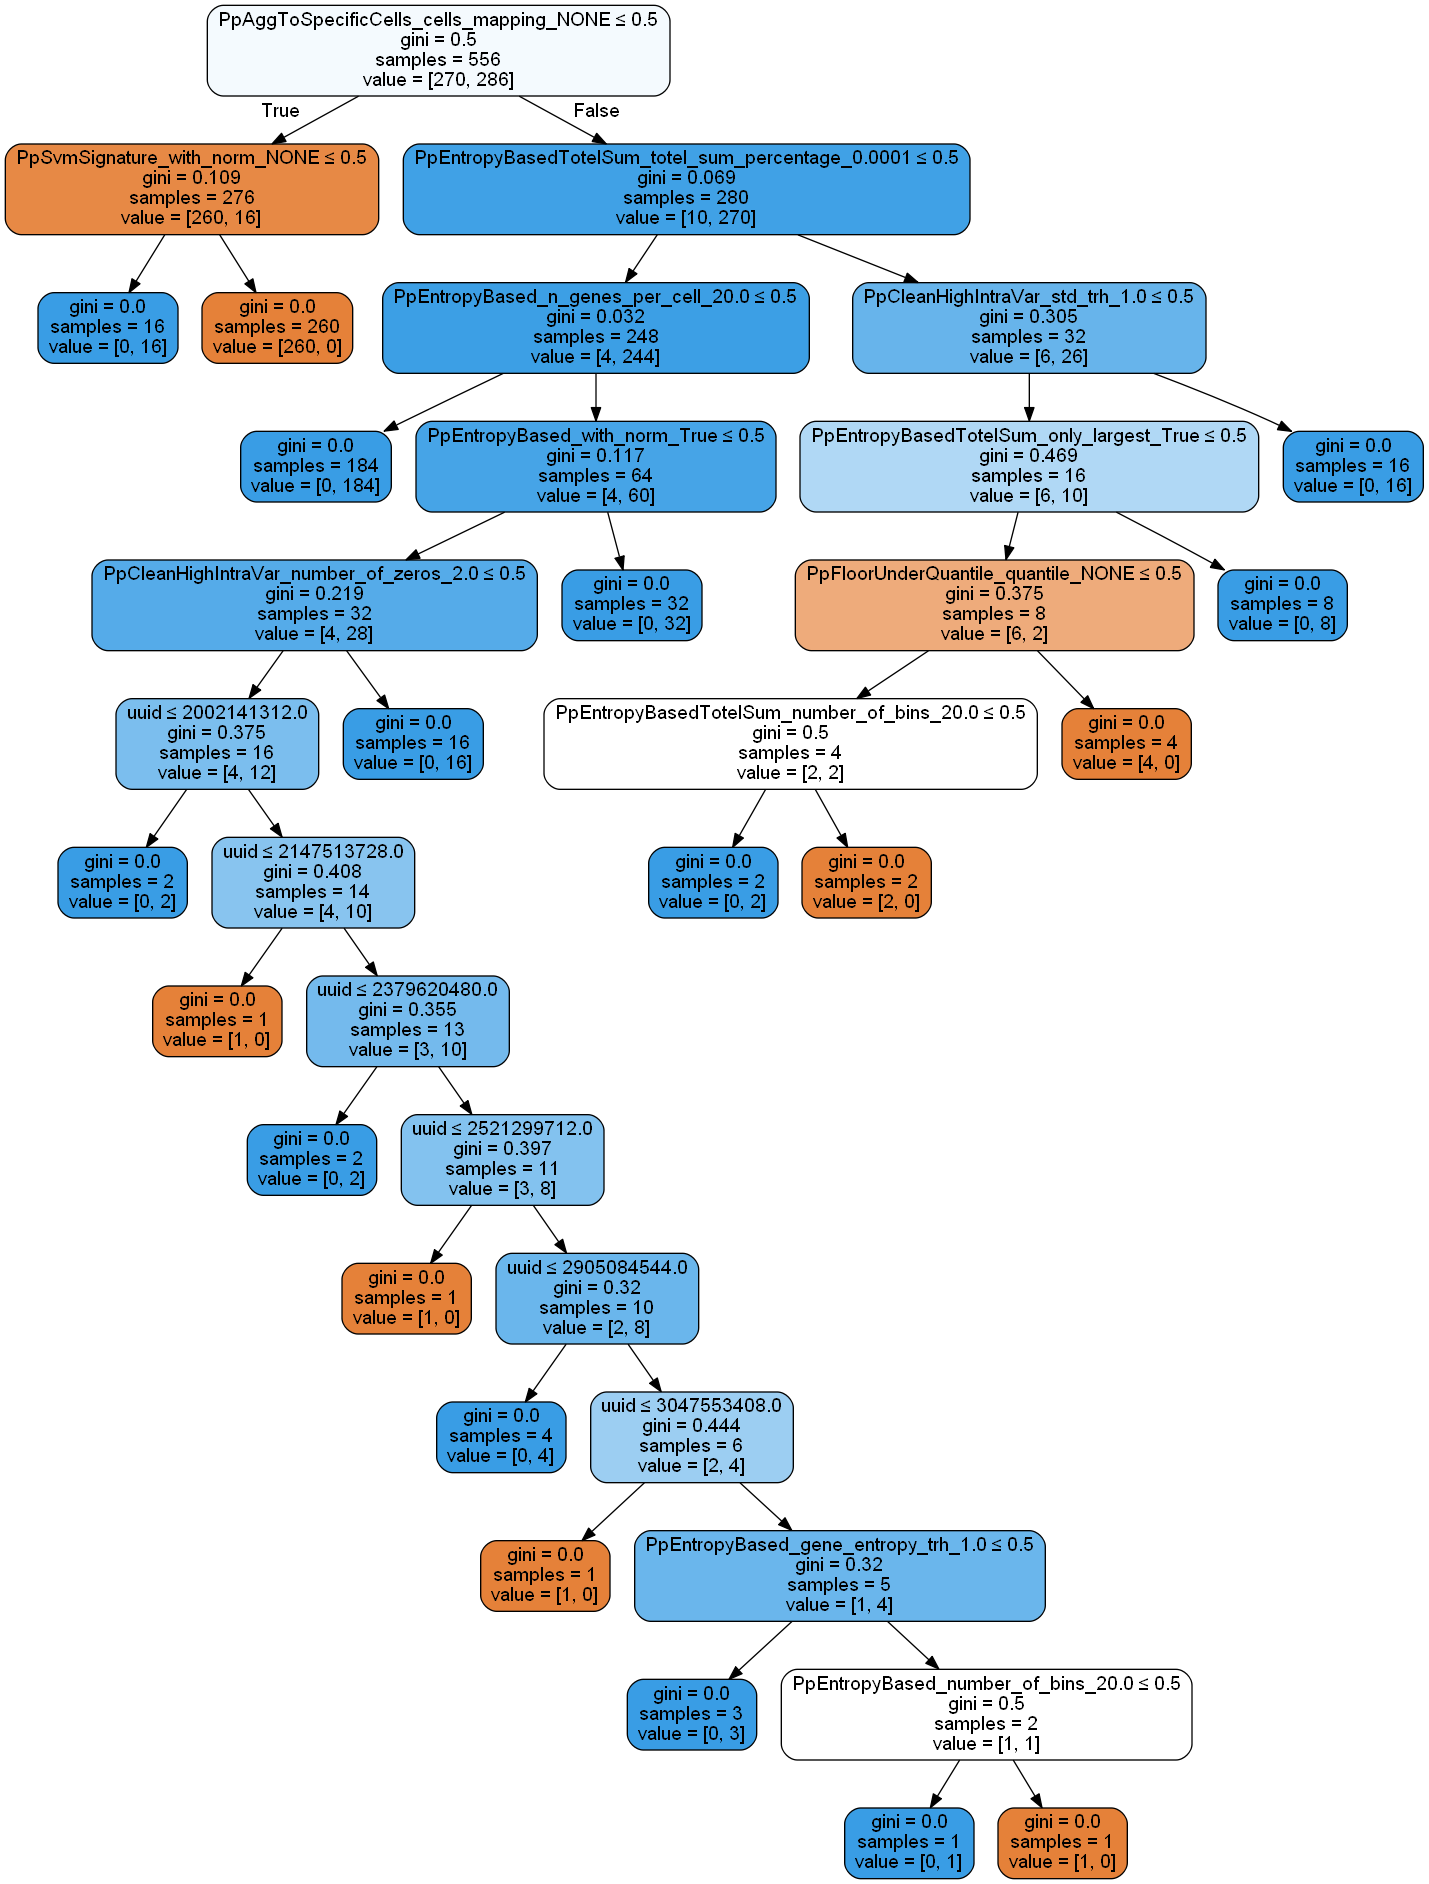

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(dummi_result_df,Y_set)

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,feature_names = dummi_result_df.columns,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [26]:
(results_df[results_df["PpAggToSpecificCells_cells_mapping"] == "NONE"]["corrMean"]<trh)

10